In [34]:
import io
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras import regularizers

In [35]:
file_path = '/content/drive/MyDrive/Colab Notebooks/tmp/data.txt'
with open(file_path, 'r') as f:
    data= f.read()

In [36]:
vocab_size = 10000
embedding_dim = 100
n_gram_sequences=[]

corpus = data.lower().split('\n')

In [37]:
tokenizer = Tokenizer(oov_token='<OOV>')
tokenizer.fit_on_texts(corpus)
print(tokenizer.word_index)
total_words = len(tokenizer.word_index) +1

{'<OOV>': 1, 'and': 2, 'the': 3, 'to': 4, 'of': 5, 'my': 6, 'i': 7, 'in': 8, 'that': 9, 'thy': 10, 'thou': 11, 'with': 12, 'for': 13, 'is': 14, 'love': 15, 'not': 16, 'but': 17, 'a': 18, 'me': 19, 'thee': 20, 'so': 21, 'be': 22, 'as': 23, 'all': 24, 'you': 25, 'his': 26, 'which': 27, 'when': 28, 'it': 29, 'this': 30, 'by': 31, 'your': 32, 'doth': 33, 'do': 34, 'from': 35, 'on': 36, 'or': 37, 'no': 38, 'then': 39, 'have': 40, 'what': 41, 'are': 42, 'if': 43, 'more': 44, 'mine': 45, 'their': 46, 'shall': 47, 'sweet': 48, 'time': 49, 'will': 50, 'they': 51, 'beauty': 52, 'nor': 53, 'eyes': 54, 'art': 55, 'her': 56, 'heart': 57, 'yet': 58, 'o': 59, 'than': 60, 'can': 61, 'should': 62, 'thine': 63, 'now': 64, 'where': 65, 'make': 66, 'one': 67, 'hath': 68, 'he': 69, 'fair': 70, 'still': 71, 'how': 72, 'eye': 73, 'him': 74, 'like': 75, 'true': 76, 'see': 77, 'am': 78, 'she': 79, 'those': 80, 'though': 81, 'being': 82, 'some': 83, 'every': 84, 'such': 85, 'own': 86, 'were': 87, 'dost': 88, 'w

In [38]:
input_sequences = []

for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
	  n_gram_sequence = token_list[:i+1]
	  input_sequences.append(n_gram_sequence)
	  print(n_gram_sequence)

Streaming output truncated to the last 5000 lines.
[154, 6, 175]
[154, 6, 175, 4]
[154, 6, 175, 4, 857]
[154, 6, 175, 4, 857, 858]
[67, 210]
[67, 210, 2596]
[67, 210, 2596, 288]
[67, 210, 2596, 288, 151]
[67, 210, 2596, 288, 151, 2597]
[859, 207]
[859, 207, 2]
[859, 207, 2, 1300]
[859, 207, 2, 1300, 14]
[859, 207, 2, 1300, 14, 24]
[859, 207, 2, 1300, 14, 24, 6]
[859, 207, 2, 1300, 14, 24, 6, 401]
[859, 207]
[859, 207, 2]
[859, 207, 2, 1300]
[859, 207, 2, 1300, 2598]
[859, 207, 2, 1300, 2598, 4]
[859, 207, 2, 1300, 2598, 4, 161]
[859, 207, 2, 1300, 2598, 4, 161, 250]
[2, 8]
[2, 8, 30]
[2, 8, 30, 206]
[2, 8, 30, 206, 14]
[2, 8, 30, 206, 14, 6]
[2, 8, 30, 206, 14, 6, 489]
[2, 8, 30, 206, 14, 6, 489, 412]
[349, 2599]
[349, 2599, 8]
[349, 2599, 8, 67]
[349, 2599, 8, 67, 27]
[349, 2599, 8, 67, 27, 1299]
[349, 2599, 8, 67, 27, 1299, 472]
[349, 2599, 8, 67, 27, 1299, 472, 1259]
[859, 207]
[859, 207, 2]
[859, 207, 2, 76]
[859, 207, 2, 76, 148]
[859, 207, 2, 76, 148, 40]
[859, 207, 2, 76, 148, 4

In [39]:
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

print(input_sequences[:10])

[[  0   0   0   0   0   0   0   0   0  35 418]
 [  0   0   0   0   0   0   0   0  35 418 878]
 [  0   0   0   0   0   0   0  35 418 878 167]
 [  0   0   0   0   0   0  35 418 878 167 214]
 [  0   0   0   0   0  35 418 878 167 214 518]
 [  0   0   0   0   0   0   0   0   0   9 879]
 [  0   0   0   0   0   0   0   0   9 879 135]
 [  0   0   0   0   0   0   0   9 879 135 352]
 [  0   0   0   0   0   0   9 879 135 352 103]
 [  0   0   0   0   0   9 879 135 352 103 157]]


In [40]:
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = tf.keras.utils.to_categorical(label, num_classes=total_words)

print(label)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
model = tf.keras.models.Sequential([tf.keras.layers.Embedding(total_words, embedding_dim, input_length=max_sequence_len-1),

                                    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(150, return_sequences=True)),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.LSTM(100),


                                    tf.keras.layers.Dense(total_words/2, activation='relu',kernel_regularizer=regularizers.l2(0.01)),
                                    tf.keras.layers.Dense(total_words, activation='softmax')

])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 10, 100)           321200    
                                                                 
 bidirectional_1 (Bidirectio  (None, 10, 300)          301200    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 10, 300)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_2 (Dense)             (None, 1606)              162206    
                                                                 
 dense_3 (Dense)             (None, 3212)              5161684   
                                                      

In [42]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(predictors, label, epochs =100, verbose=1)

Epoch 1/100
484/484 [==============================] - 20s 26ms/step - loss: 6.8991 - accuracy: 0.0200
Epoch 2/100
484/484 [==============================] - 6s 13ms/step - loss: 6.5056 - accuracy: 0.0228
Epoch 3/100
484/484 [==============================] - 6s 12ms/step - loss: 6.4040 - accuracy: 0.0257
Epoch 4/100
484/484 [==============================] - 5s 11ms/step - loss: 6.2867 - accuracy: 0.0298
Epoch 5/100
484/484 [==============================] - 6s 12ms/step - loss: 6.2052 - accuracy: 0.0329
Epoch 6/100
484/484 [==============================] - 7s 14ms/step - loss: 6.1411 - accuracy: 0.0378
Epoch 7/100
484/484 [==============================] - 5s 11ms/step - loss: 6.0733 - accuracy: 0.0389
Epoch 8/100
484/484 [==============================] - 6s 13ms/step - loss: 6.0078 - accuracy: 0.0418
Epoch 9/100
484/484 [==============================] - 5s 11ms/step - loss: 5.9358 - accuracy: 0.0477
Epoch 10/100
484/484 [==============================] - 6s 12ms/step - loss: 5.85

In [43]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

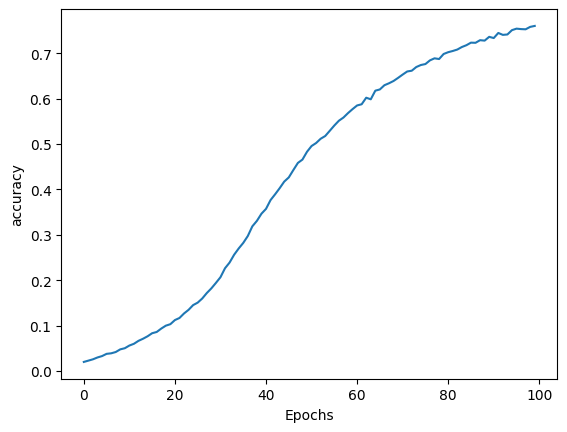

In [44]:
plot_graphs(history, 'accuracy')

In [47]:
seed_text = 'this film was so good that I felt'
next_words =10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], padding='pre', maxlen =max_sequence_len-1)


    predicted = model.predict(token_list)
    predicted = np.argmax(predicted, axis=-1)[0]
    #predicted = np.argmax(model.predict(token_list), axis=-1)

    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word
print(seed_text)


1/1 [==============================] - 0s 22ms/step
this film was so good that I felt there prove ' ' weeds prove life o'er state me
